In [1]:
import numpy as np
import healpy as hp
from lookahead import Lookahead
import matplotlib.pyplot as plt
%matplotlib inline


# Lookahead

Lookahead pregenerates a map of the sky that stores a 0 or 1 value value on whether a particular field or healpixel is observable during a particular time interval. These tables are loaded in segments as the survey simulation progresses. 

At runtime, Driver.py creates a lookahead object. Driver then "drives" the lookahead object along with the survey. This is accomplished by keeping the Lookahead object's date parameter updated as the survey progresses, and also:

    1. When driver calls start_survey(), it loads the first file.
    2. When driver calls start_night(), it calls Lookahead.start_night(), which trims the elapsed dates off of the giant array it's holding in memory, and loads the next file if necessary.
    3. When driver calls select_next_target(), it calculates lookahead bonuses for every field/hpix during the current time interval.
    4. The lookahead object is passed to the the proposal as an argument for suggest_targets(). Each area distribution proposal then can query the Lookahead object for bonuses for individual fields. 
   

Below is a visualization of the moon avoidance map, with a lookahead window that spans about 4 nights. This is probably too short a window to be useful, but it makes it easy to see the moon moving across the sky. In this map, a 0 value means a field is never observable during the window, whereas higher values are more often observable.

loading lookahead_pre_seg_000.npz


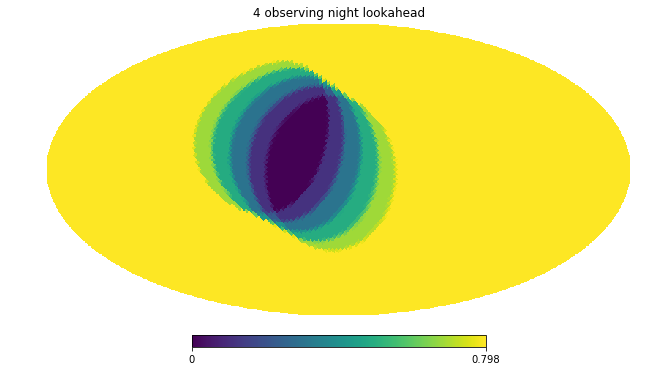

In [2]:
la500 = Lookahead(59560.16,window_size=500,healpix=True,nSides=32)
la500.load_segment()
la500.calculate_bonus()
sky = la500.current_sky['moonangle']
hp.mollview(sky,title="4 observing night lookahead")

In [3]:
la8000 = Lookahead(59560.16,window_size=8000,healpix=True,nSides=32)
la8000.load_segment()
la8000.calculate_bonus()


loading lookahead_pre_seg_000.npz
loading lookahead_pre_seg_001.npz


Here is a similar map, only this time we have a 60 day window, two full lunations. 

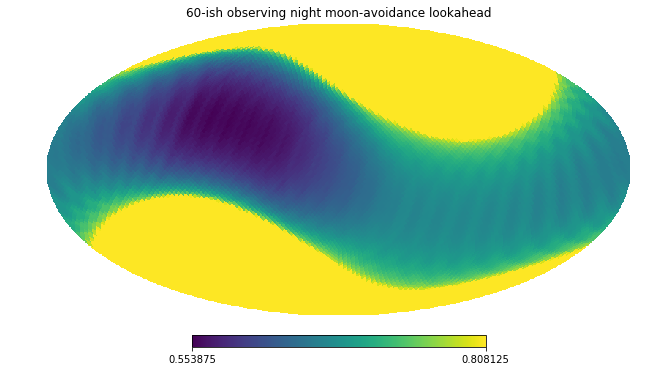

In [4]:
sky = la8000.current_sky['moonangle']
hp.mollview(sky,title="60-ish observing night moon-avoidance lookahead")

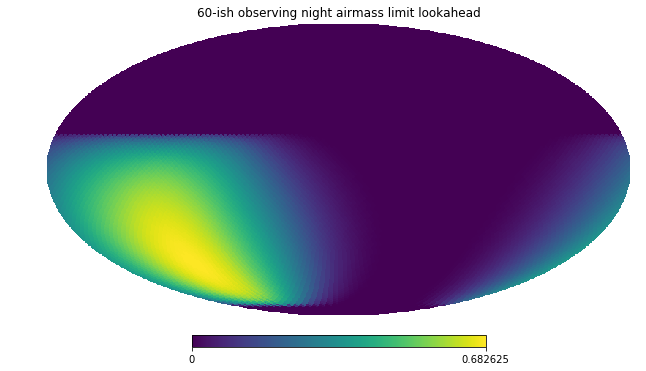

In [5]:
sky = la8000.current_sky['airmass']
hp.mollview(sky,title="60-ish observing night airmass limit lookahead")

Below is the map of the output scores that are added into the proposal's bonus for each field. It is a composite of the lookahead maps for airmass, moon avoidance, and sky brightness in a particular filter. After composition, we normalize the values and then invert it, so that the higher values are now in the fields with more limited visibility. You can see the path of the moon is now a lighter band, indicating that these fields are now slightly preferred because they are sometimes obscured by the moon.

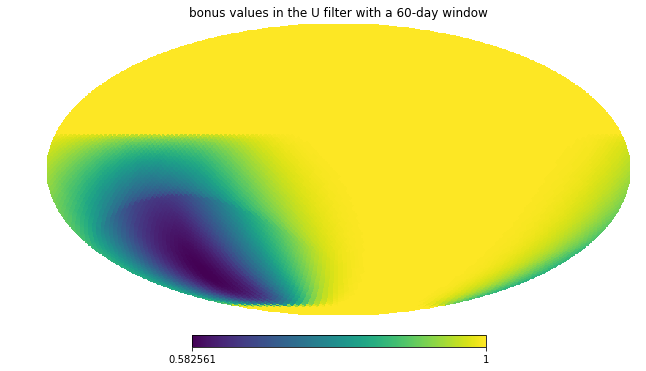

In [8]:
sky = la8000.current_sky['u']
hp.mollview(sky,title="bonus values in the U filter with a 60-day window")